# Welcome to Data Visualization

---

# Univariate plotting with Pandas

In [1]:
%matplotlib inline

import pandas as pd

In [38]:
reviews = pd.read_csv("winemag-data_first150k.csv", index_col=0)
reviews.head(3)

country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   

         region_1 region_2             variety                   winery  
0     Napa Valley     Napa  Cabernet Sauvignon                    Heitz  
1            Toro      NaN       Tinta de Toro  Bodega Carmen Rodríguez  
2  Knights Valley   Sonoma     Sauvignon Blanc                 Macauley

### Bar Charts and Categorical Data

_Top 10 Wine producing States_

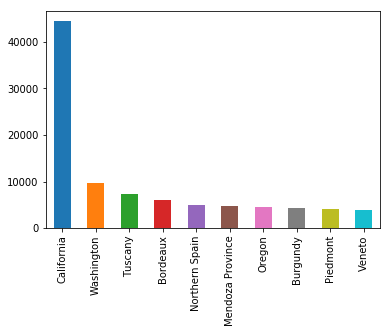

In [3]:
reviews["province"].value_counts().head(10).plot.bar()

_Percentage of share of top 10 wine producing States_

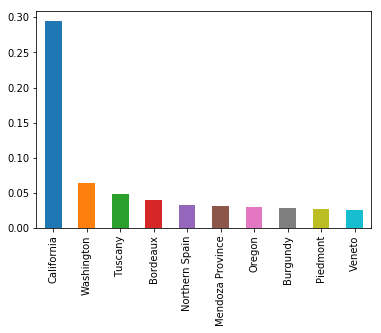

In [11]:
(reviews["province"].value_counts().head(10) / len(reviews)).plot.bar()

_Points allocated to various wines_

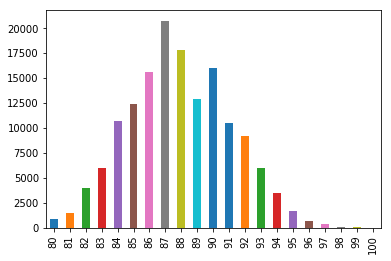

In [4]:
reviews["points"].value_counts().sort_index().plot.bar()

### Line Charts

_Line chart for points allocated_

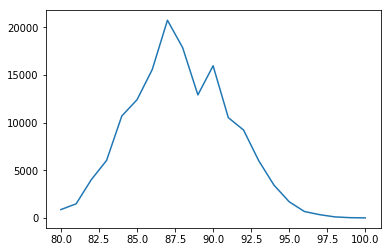

In [5]:
reviews["points"].value_counts().sort_index().plot.line()

> In general, if your data can fit into a bar chart, just use a bar chart!

### Histograms
_A histogram is a special kind of bar plot that splits your data into even intervals and displays how many rows are there in each interval_

In [8]:
reviews[reviews.price < 200].price.plot.hist()

_Histograms Dont work very well with skewed data_

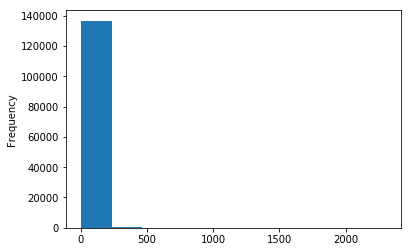

In [10]:
reviews.price.plot.hist()

_Histograms work well for ordinal categorical variables, like points_

In [11]:
reviews.points.plot.hist()

## Conclusions and Exercises
_Load the pokemon dataset_

In [12]:
pd.set_option("max_columns", None)
pokemon = pd.read_csv("pokemon.csv")
pokemon.head(3)

abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   

   against_flying  against_ghost  against_grass  against_ground  against_ice  \
0             2.0            1.0           0.25             1.0          2.0   
1             2.0            1.0           0.25             1.0          2.0   
2             2.0            1.0           0.25             1.0          2.0   

   against_normal  against_poison  against_psychic  against_rock  \
0             1.0             1.0              2.0           1.0   
1             1.0             1.0              2.0           1.0   
2             1.0             1.0              2.0           1.0   

   against_steel  against_water  attack  base_egg_steps  base_happiness  \
0            1.0            0.5      49            5120              70   
1            1.0            0.5      62            5120              70   
2            1.0            0.5     100            5120              70   

   base_total capture_rate classfication  defense  experience_growth  \
0         318           45  Seed Pokémon       49            1059860   
1         405           45  Seed Pokémon       63            1059860   
2         625           45  Seed Pokémon      123            1059860   

   height_m  hp     japanese_name       name  percentage_male  pokedex_number  \
0       0.7  45  Fushigidaneフシギダネ  Bulbasaur             88.1               1   
1       1.0  60   Fushigisouフシギソウ    Ivysaur             88.1               2   
2       2.0  80  Fushigibanaフシギバナ   Venusaur             88.1               3   

   sp_attack  sp_defense  speed  type1   type2  weight_kg  generation  \
0         65          65     45  grass  poison        6.9           1   
1         80          80     60  grass  poison       13.0           1   
2        122         120     80  grass  poison      100.0           1   

   is_legendary  
0             0  
1             0  
2             0

_Frequency of Pokemon by type_

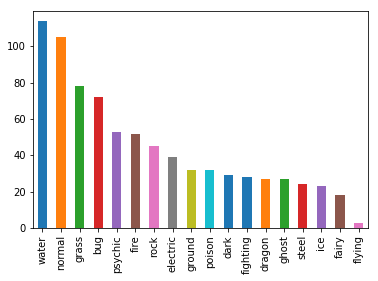

In [27]:
pokemon.type1.value_counts().plot.bar()

In [34]:
pokemon.hp.value_counts().sort_index().plot.line()

In [37]:
pokemon.weight_kg.plot.hist()

### Pie Charts

_Top 10 wine producing States_

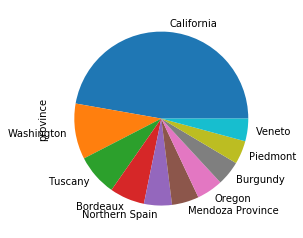

In [47]:
reviews.province.value_counts().head(10).plot.pie()

# Unsquish the pie chart
import matplotlib.pyplot as plt
plt.gca().set_aspect("equal")

_Pie charts are like bar charts, but wrapped around a circle. Just use a bar chart instead._

---

# Bivariate Plotting with Pandas

In [49]:
reviews = pd.read_csv("winemag-data_first150k.csv", index_col=0)
reviews.head()

country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   
3      US  This spent 20 months in 30% new French oak, an...   
4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro                NaN       Tinta de Toro   
2     Knights Valley             Sonoma     Sauvignon Blanc   
3  Willamette Valley  Willamette Valley          Pinot Noir   
4             Bandol                NaN  Provence red blend   

                    winery  
0                    Heitz  
1  Bodega Carmen Rodríguez  
2                 Macauley  
3                    Ponzi  
4     Domaine de la Bégude

### Scatter Plot

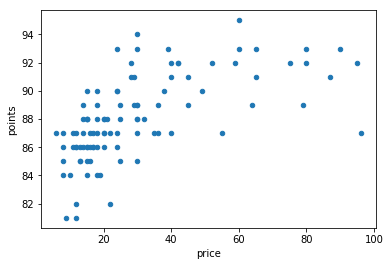

In [59]:
reviews[reviews.price < 100].sample(100).plot.scatter(x="price", y="points")

In [60]:
reviews[reviews.price < 100].plot.scatter(x="price", y="points")

### Hexplot

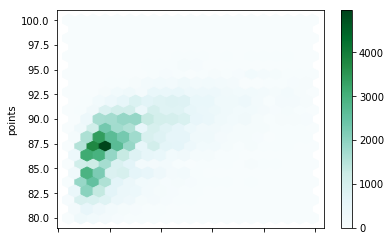

In [69]:
reviews[reviews.price<100].plot.hexbin(x="price", y="points", gridsize=20)

### Stacked Plots

In [70]:
wine_counts = pd.read_csv("top-five-wine-score-counts.csv", index_col=0)

In [73]:
wine_counts.head()

Bordeaux-style Red Blend  Cabernet Sauvignon  Chardonnay  Pinot Noir  \
points                                                                         
80                           5.0                87.0        68.0        36.0   
81                          18.0               159.0       150.0        83.0   
82                          72.0               435.0       517.0       295.0   
83                          95.0               570.0       669.0       346.0   
84                         268.0               923.0      1146.0       733.0   

        Red Blend  
points             
80           72.0  
81          107.0  
82          223.0  
83          364.0  
84          602.0

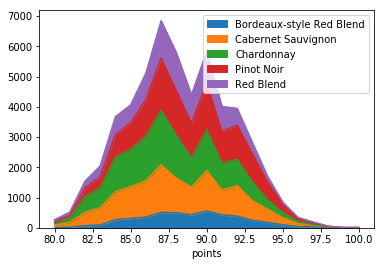

In [75]:
wine_counts.plot.area()

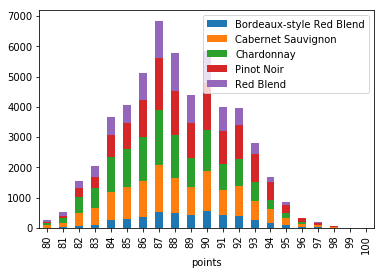

In [77]:
wine_counts.plot.bar(stacked=True)

### Bivariate Line Charts

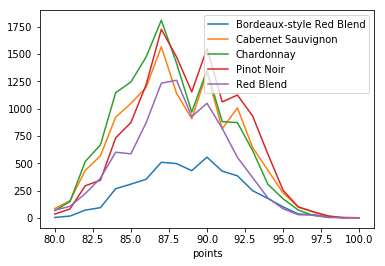

In [78]:
wine_counts.plot.line()

### Replicate some plots

In [85]:
pokemon = pd.read_csv("Pokemon.csv", index_col=0)
pokemon.head()

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
#                                                                              
1              Bulbasaur  Grass  Poison    318  45      49       49       65   
2                Ivysaur  Grass  Poison    405  60      62       63       80   
3               Venusaur  Grass  Poison    525  80      82       83      100   
3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123      122   
4             Charmander   Fire     NaN    309  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
#                                         
1       65     45           1      False  
2       80     60           1      False  
3      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False

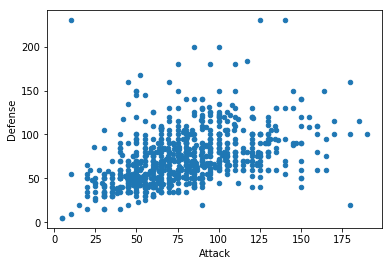

In [87]:
pokemon.plot.scatter(x="Attack", y="Defense")

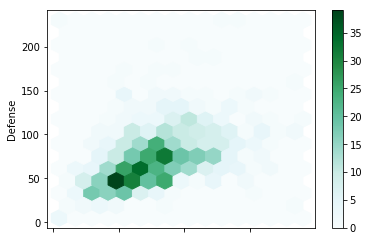

In [91]:
pokemon.plot.hexbin(x="Attack", y="Defense", gridsize=15)

In [92]:
pokemon_stats_legendary = pokemon.groupby(['Legendary', 'Generation']).mean()[['Attack', 'Defense']]

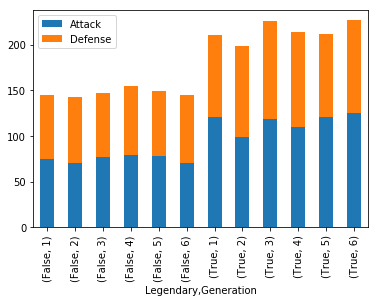

In [95]:
pokemon_stats_legendary.plot.bar(stacked=True)

In [97]:
pokemon_stats_by_generation = pokemon.groupby('Generation').mean()[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
pokemon_stats_by_generation

HP     Attack    Defense    Sp. Atk    Sp. Def      Speed
Generation                                                                  
1           65.819277  76.638554  70.861446  71.819277  69.090361  72.584337
2           71.207547  72.028302  73.386792  65.943396  73.905660  61.811321
3           66.543750  81.625000  74.100000  75.806250  71.225000  66.925000
4           73.082645  82.867769  78.132231  76.404959  77.190083  71.338843
5           71.787879  82.066667  72.327273  71.987879  68.739394  68.078788
6           68.268293  75.804878  76.682927  74.292683  74.890244  66.439024

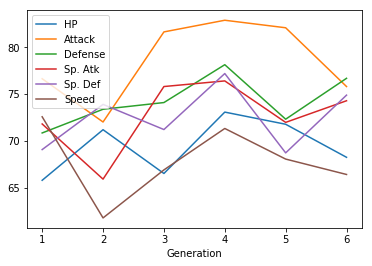

In [99]:
pokemon_stats_by_generation.plot.line()

---

# Styling your plots

In [101]:
reviews = pd.read_csv("winemag-data_first150k.csv", index_col=0)
reviews.head(3)

country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   

         region_1 region_2             variety                   winery  
0     Napa Valley     Napa  Cabernet Sauvignon                    Heitz  
1            Toro      NaN       Tinta de Toro  Bodega Carmen Rodríguez  
2  Knights Valley   Sonoma     Sauvignon Blanc                 Macauley

### Points on style

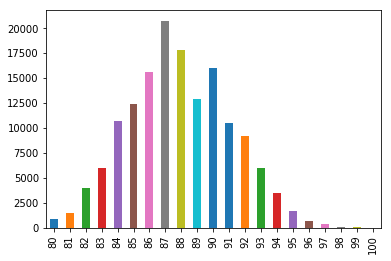

In [104]:
(reviews
    .points
    .value_counts()
    .sort_index()
    .plot
    .bar())

#### Making the plot bigger (`figsize`)

In [105]:
(reviews
    .points
    .value_counts()
    .sort_index()
    .plot
    .bar(figsize=(12,6)))

_`figsize` -> Size in inches_

#### Change color of the bars (`color`)

In [112]:
(reviews
    .points
    .value_counts()
    .sort_index()
    .plot
    .bar(figsize=(12,6), color="grey"))

#### Adjust font-size of the labels (`fontsize`)

In [114]:
(reviews
    .points
    .value_counts()
    .sort_index()
    .plot
    .bar(
        figsize=(12,6), 
        color="grey",
        fontsize=14))

#### Add title to the plot (`title`)

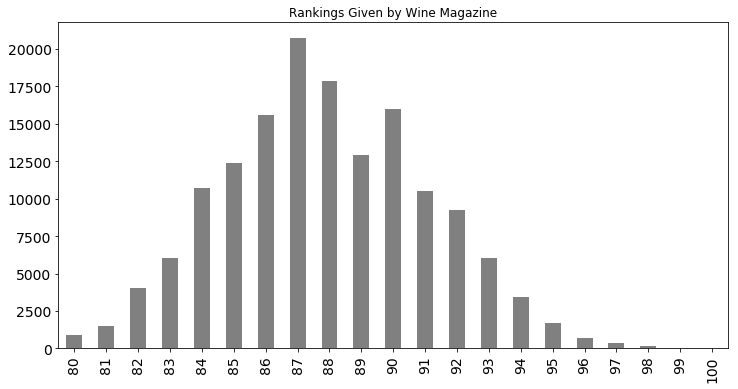

In [115]:
(reviews
    .points
    .value_counts()
    .sort_index()
    .plot
    .bar(
        figsize=(12,6), 
        color="grey",
        fontsize=14,
        title="Rankings Given by Wine Magazine"))

#### Increase the title fontsize (Need to use `matplotlib` for this)

In [116]:
import matplotlib.pyplot as plt

ax = (reviews
         .points
         .value_counts()
         .sort_index()
         .plot
         .bar(
             figsize=(12,6),
             color="grey",
             fontsize=14))

ax.set_title("Rankings Given by Wine Magazine", fontsize=20)

Text(0.5,1,'Rankings Given by Wine Magazine')

### Exercises

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

pokemon = pd.read_csv("Pokemon.csv")
pokemon.head(3)

#       Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1  Bulbasaur  Grass  Poison    318  45      49       49       65       65   
1  2    Ivysaur  Grass  Poison    405  60      62       63       80       80   
2  3   Venusaur  Grass  Poison    525  80      82       83      100      100   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False

In [120]:
pokemon = pokemon.set_index(keys="#")

In [121]:
pokemon.head(3)

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
#                                                                           
1  Bulbasaur  Grass  Poison    318  45      49       49       65       65   
2    Ivysaur  Grass  Poison    405  60      62       63       80       80   
3   Venusaur  Grass  Poison    525  80      82       83      100      100   

   Speed  Generation  Legendary  
#                                
1     45           1      False  
2     60           1      False  
3     80           1      False

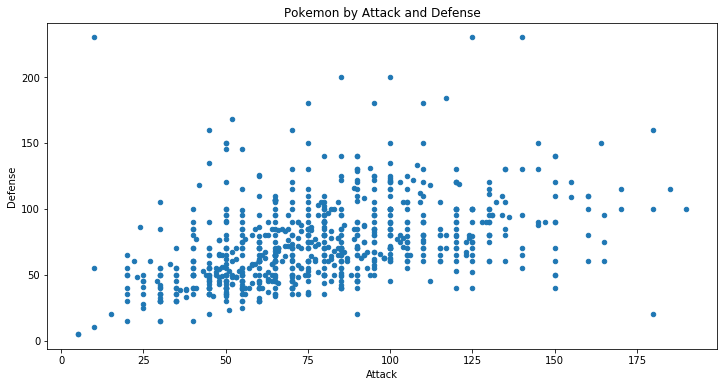

In [124]:
(pokemon
    .plot
    .scatter(
        x="Attack", 
        y="Defense",
        figsize=(12,6),
        title="Pokemon by Attack and Defense"))

Text(0.5,1,'Pokemon by Stat Total')

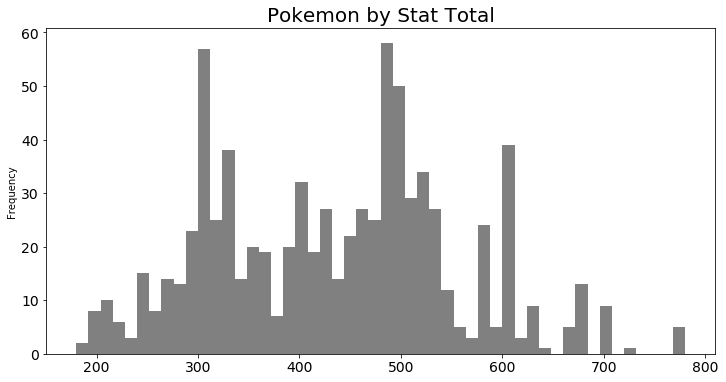

In [133]:
ax = (pokemon
    .Total
    .plot
    .hist(color="gray", bins=50, figsize=(12,6), fontsize=14))

ax.set_title("Pokemon by Stat Total", fontsize=20)

In [140]:
ax = (pokemon["Type 1"]
         .value_counts()
         .plot
         .bar(
             figsize=(12, 6),
             color="blue",
             fontsize=14))

ax.set_title("Pokemon by Primary Type", fontsize=20)

Text(0.5,1,'Pokemon by Primary Type')

---

# Subplots

In [142]:
import pandas as pd
reviews = pd.read_csv("winemag-data_first150k.csv", index_col=0)
reviews.head(3)

country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   

         region_1 region_2             variety                   winery  
0     Napa Valley     Napa  Cabernet Sauvignon                    Heitz  
1            Toro      NaN       Tinta de Toro  Bodega Carmen Rodríguez  
2  Knights Valley   Sonoma     Sauvignon Blanc                 Macauley

### Subplotting

`plt.subplots(<rows>, <cols>)`

In [143]:
import matplotlib.pyplot as plt

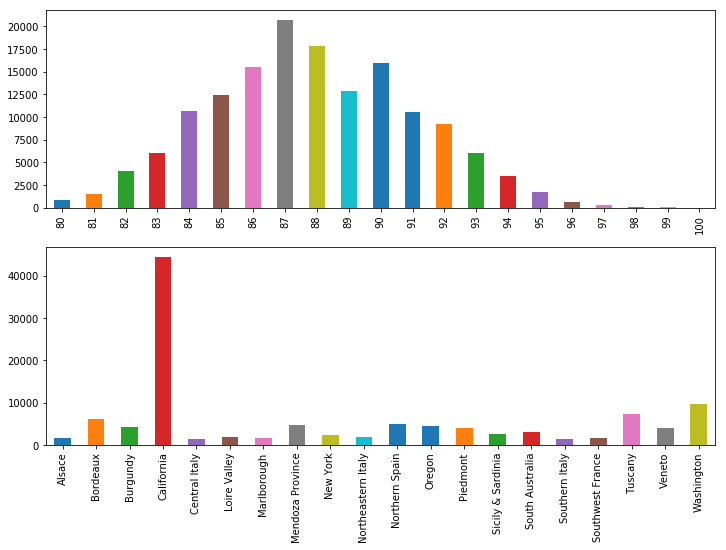

In [153]:
fig, axarr = plt.subplots(2, 1, figsize=(12,8))

reviews.points.value_counts().sort_index().plot.bar(ax=axarr[0])
reviews.province.value_counts().head(20).sort_index().plot.bar(ax=axarr[1])

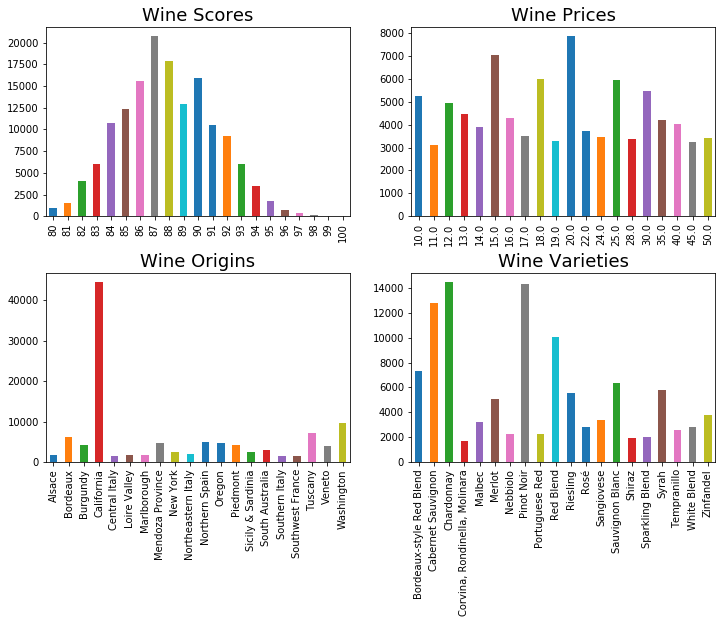

In [163]:
fig, axarr = plt.subplots(2,2, figsize=(12,8))

reviews.points.value_counts().sort_index().plot.bar(
    ax=axarr[0][0])
axarr[0][0].set_title("Wine Scores", fontsize=18)

reviews.variety.value_counts().head(20).sort_index().plot.bar(
    ax=axarr[1][1])
axarr[1][1].set_title("Wine Varieties", fontsize=18)

reviews.province.value_counts().head(20).sort_index().plot.bar(
    ax=axarr[1][0])
axarr[1][0].set_title("Wine Origins", fontsize=18)

reviews.price.value_counts().head(20).sort_index().plot.bar(
    ax=axarr[0][1])
axarr[0][1].set_title("Wine Prices", fontsize=18)

plt.subplots_adjust(hspace=0.3)

---

# Multivariate Plotting

In [1]:
import pandas as pd
pd.set_option("max_columns", None)
df = pd.read_csv("CompleteDataset.csv", index_col=0)

/home/shank/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
import re
import numpy as np

In [3]:
footballers = df.copy()
footballers.head(3)

Name  Age                                            Photo  \
0  Cristiano Ronaldo   32   https://cdn.sofifa.org/48/18/players/20801.png   
1           L. Messi   30  https://cdn.sofifa.org/48/18/players/158023.png   
2             Neymar   25  https://cdn.sofifa.org/48/18/players/190871.png   

  Nationality                                 Flag  Overall  Potential  \
0    Portugal  https://cdn.sofifa.org/flags/38.png       94         94   
1   Argentina  https://cdn.sofifa.org/flags/52.png       93         93   
2      Brazil  https://cdn.sofifa.org/flags/54.png       92         94   

                  Club                                   Club Logo   Value  \
0       Real Madrid CF  https://cdn.sofifa.org/24/18/teams/243.png  €95.5M   
1         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png   €105M   
2  Paris Saint-Germain   https://cdn.sofifa.org/24/18/teams/73.png   €123M   

    Wage  Special Acceleration Aggression Agility Balance Ball control  \
0  €565K     2228           89         63      89      63           93   
1  €565K     2154           92         48      90      95           95   
2  €280K     2100           94         56      96      82           95   

  Composure Crossing Curve Dribbling Finishing Free kick accuracy GK diving  \
0        95       85    81        91        94                 76         7   
1        96       77    89        97        95                 90         6   
2        92       75    81        96        89                 84         9   

  GK handling GK kicking GK positioning GK reflexes Heading accuracy  \
0          11         15             14          11               88   
1          11         15             14           8               71   
2           9         15             15          11               62   

  Interceptions Jumping Long passing Long shots Marking Penalties Positioning  \
0            29      95           77         92      22        85          95   
1            22      68           87         88      13        74          93   
2            36      61           75         77      21        81          90   

  Reactions Short passing Shot power Sliding tackle Sprint speed Stamina  \
0        96            83         94             23           91      92   
1        95            88         85             26           87      73   
2        88            81         80             33           90      78   

  Standing tackle Strength Vision Volleys   CAM    CB   CDM    CF    CM  \
0              31       80     85      88  89.0  53.0  62.0  91.0  82.0   
1              28       59     90      85  92.0  45.0  59.0  92.0  84.0   
2              24       53     80      83  88.0  46.0  59.0  88.0  79.0   

       ID   LAM    LB   LCB   LCM   LDM    LF    LM    LS    LW   LWB  \
0   20801  89.0  61.0  53.0  82.0  62.0  91.0  89.0  92.0  91.0  66.0   
1  158023  92.0  57.0  45.0  84.0  59.0  92.0  90.0  88.0  91.0  62.0   
2  190871  88.0  59.0  46.0  79.0  59.0  88.0  87.0  84.0  89.0  64.0   

  Preferred Positions   RAM    RB   RCB   RCM   RDM    RF    RM    RS    RW  \
0              ST LW   89.0  61.0  53.0  82.0  62.0  91.0  89.0  92.0  91.0   
1                 RW   92.0  57.0  45.0  84.0  59.0  92.0  90.0  88.0  91.0   
2                 LW   88.0  59.0  46.0  79.0  59.0  88.0  87.0  84.0  89.0   

    RWB    ST  
0  66.0  92.0  
1  62.0  88.0  
2  64.0  84.0

_Bring the value of all the footballers in the same range (Million)_

In [4]:
footballers["Unit"] = df["Value"].str[-1]

In [10]:
footballers[footballers.Unit == "0"]

Name  Age                                            Photo  \
162              Oscar   25  https://cdn.sofifa.org/48/18/players/188152.png   
167       Adrien Silva   28  https://cdn.sofifa.org/48/18/players/184826.png   
274          A. Witsel   28  https://cdn.sofifa.org/48/18/players/177413.png   
472            M. Berg   30  https://cdn.sofifa.org/48/18/players/176733.png   
488     Renato Augusto   29  https://cdn.sofifa.org/48/18/players/169195.png   
658           Gervinho   30  https://cdn.sofifa.org/48/18/players/170733.png   
925       B. Moukandjo   28  https://cdn.sofifa.org/48/18/players/185090.png   
944          B. Dočkal   28  https://cdn.sofifa.org/48/18/players/181271.png   
1019               Gil   30  https://cdn.sofifa.org/48/18/players/193869.png   
1273        C. Riveros   34  https://cdn.sofifa.org/48/18/players/174381.png   
1351         Zheng Zhi   36  https://cdn.sofifa.org/48/18/players/158293.png   
1402            P. Tau   23  https://cdn.sofifa.org/48/18/players/225144.png   
1549        E. Paredes   36  https://cdn.sofifa.org/48/18/players/196073.png   
1597     T. Hlatshwayo   27  https://cdn.sofifa.org/48/18/players/219911.png   
1802       D. González   23  https://cdn.sofifa.org/48/18/players/209523.png   
1819        M. Martins   30  https://cdn.sofifa.org/48/18/players/181375.png   
1826     J. Beausejour   33  https://cdn.sofifa.org/48/18/players/158851.png   
1888      C. Rodríguez   31  https://cdn.sofifa.org/48/18/players/170664.png   
1899        C. Toselli   29  https://cdn.sofifa.org/48/18/players/189357.png   
2000           G. Jara   31  https://cdn.sofifa.org/48/18/players/194795.png   
2090        Zeng Cheng   30  https://cdn.sofifa.org/48/18/players/182043.png   
2224          B. Nivet   40    https://cdn.sofifa.org/48/18/players/3665.png   
2241          T. Sivok   33  https://cdn.sofifa.org/48/18/players/155989.png   
2246      T. Sainsbury   25  https://cdn.sofifa.org/48/18/players/199000.png   
2281           Gao Lin   31  https://cdn.sofifa.org/48/18/players/158309.png   
2350           Z. Gera   38  https://cdn.sofifa.org/48/18/players/137089.png   
2424        P. Gallese   27  https://cdn.sofifa.org/48/18/players/225701.png   
2483       V. Stoyanov   30  https://cdn.sofifa.org/48/18/players/200896.png   
2518        J. Herrera   36  https://cdn.sofifa.org/48/18/players/174542.png   
2552     Feng Xiaoting   31  https://cdn.sofifa.org/48/18/players/175589.png   
...                ...  ...                                              ...   
14865  G. Singh Sandhu   25  https://cdn.sofifa.org/48/18/players/225213.png   
14921      Deng Hanwen   22  https://cdn.sofifa.org/48/18/players/237010.png   
15237       K. Pereira   29  https://cdn.sofifa.org/48/18/players/228189.png   
15257         J. Singh   25  https://cdn.sofifa.org/48/18/players/228198.png   
15330         B. Jairu   35  https://cdn.sofifa.org/48/18/players/231567.png   
15564         G. Bokwé   27  https://cdn.sofifa.org/48/18/players/237318.png   
15592      A. Khongjee   29  https://cdn.sofifa.org/48/18/players/223762.png   
15598        A. George   25  https://cdn.sofifa.org/48/18/players/211478.png   
15724     A. Fernandes   28  https://cdn.sofifa.org/48/18/players/228190.png   
15738       H. Narzary   23  https://cdn.sofifa.org/48/18/players/228199.png   
15829        A. Mondal   27  https://cdn.sofifa.org/48/18/players/221588.png   
15839         C. Lewis   20  https://cdn.sofifa.org/48/18/players/231063.png   
15996        R. Borges   25  https://cdn.sofifa.org/48/18/players/231933.png   
16035           N. Das   23  https://cdn.sofifa.org/48/18/players/223764.png   
16190      T. Williams   33  https://cdn.sofifa.org/48/18/players/174202.png   
16703         D. Wynne   22  https://cdn.sofifa.org/48/18/players/226057.png   
16707       M. Rafique   24  https://cdn.sofifa.org/48/18/players/234507.png   
16815         S. Singh   25  https://cdn.sofifa.org/48/18/players/228989.png   
16816    A. Edatho

In [11]:
footballers["Value (M)"] = np.where(footballers["Unit"] == "0", 
                                    0, 
                                    footballers["Value"].str[1:-1].replace(r'[a-zA-Z]', ''))

In [15]:
footballers["Value (M)"] = footballers["Value (M)"].astype('float')

In [19]:
footballers["Value (M)"] = np.where(footballers["Unit"] == "M",
                                    footballers["Value (M)"],
                                    footballers["Value (M)"]/1000)

In [21]:
footballers.head()

Name  Age                                            Photo  \
0  Cristiano Ronaldo   32   https://cdn.sofifa.org/48/18/players/20801.png   
1           L. Messi   30  https://cdn.sofifa.org/48/18/players/158023.png   
2             Neymar   25  https://cdn.sofifa.org/48/18/players/190871.png   
3          L. Suárez   30  https://cdn.sofifa.org/48/18/players/176580.png   
4           M. Neuer   31  https://cdn.sofifa.org/48/18/players/167495.png   

  Nationality                                 Flag  Overall  Potential  \
0    Portugal  https://cdn.sofifa.org/flags/38.png       94         94   
1   Argentina  https://cdn.sofifa.org/flags/52.png       93         93   
2      Brazil  https://cdn.sofifa.org/flags/54.png       92         94   
3     Uruguay  https://cdn.sofifa.org/flags/60.png       92         92   
4     Germany  https://cdn.sofifa.org/flags/21.png       92         92   

                  Club                                   Club Logo   Value  \
0       Real Madrid CF  https://cdn.sofifa.org/24/18/teams/243.png  €95.5M   
1         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png   €105M   
2  Paris Saint-Germain   https://cdn.sofifa.org/24/18/teams/73.png   €123M   
3         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png    €97M   
4     FC Bayern Munich   https://cdn.sofifa.org/24/18/teams/21.png    €61M   

    Wage  Special Acceleration Aggression Agility Balance Ball control  \
0  €565K     2228           89         63      89      63           93   
1  €565K     2154           92         48      90      95           95   
2  €280K     2100           94         56      96      82           95   
3  €510K     2291           88         78      86      60           91   
4  €230K     1493           58         29      52      35           48   

  Composure Crossing Curve Dribbling Finishing Free kick accuracy GK diving  \
0        95       85    81        91        94                 76         7   
1        96       77    89        97        95                 90         6   
2        92       75    81        96        89                 84         9   
3        83       77    86        86        94                 84        27   
4        70       15    14        30        13                 11        91   

  GK handling GK kicking GK positioning GK reflexes Heading accuracy  \
0          11         15             14          11               88   
1          11         15             14           8               71   
2           9         15             15          11               62   
3          25         31             33          37               77   
4          90         95             91          89               25   

  Interceptions Jumping Long passing Long shots Marking Penalties Positioning  \
0            29      95           77         92      22        85          95   
1            22      68           87         88      13        74          93   
2            36      61           75         77      21        81          90   
3            41      69           64         86      30        85          92   
4            30      78           59         16      10        47          12   

  Reactions Short passing Shot power Sliding tackle Sprint speed Stamina  \
0        96            83         94             23           91      92   
1        95            88         85             26           87      73   
2        88            81         80             33           90      78   
3        93            83         87             38           77      89   
4        85            55         25             11           61      44   

  Standing tackle Strength Vision Volleys   CAM    CB   CDM    CF    CM  \
0              31       80     85      88  89.0  53.0  62.0  91.0  82.0   
1              28       59     90      85  92.0  45.0  59.0  92.0  84.0   
2              24       53     80      83  88.0  46.0  59.0  88.0  79.0   
3              45       80     84   

### Multivariate Scatter Plots

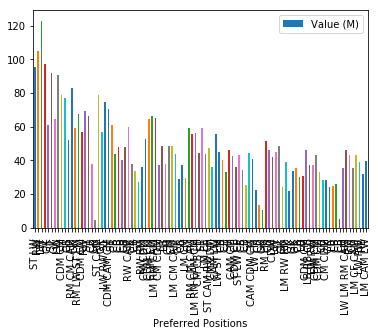

In [28]:
footballers.head(100).plot.bar(y="Value (M)", x="Preferred Positions")